In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df = df.drop("CustomerID",axis=1)

In [7]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [8]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
X = df.drop("Gender",axis=1)


In [13]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [17]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

c:\Users\HP\my_python_project\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\HP\my_python_project\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "c:\Users\HP\my_python_project\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popen

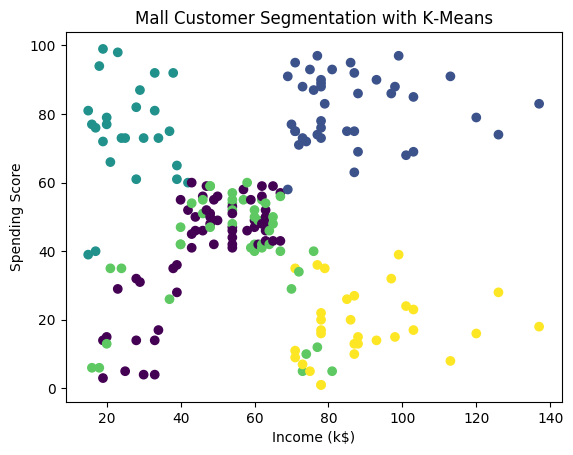

In [19]:
df['Cluster'] = labels
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=labels, cmap='viridis')
plt.xlabel('Income (k$)')
plt.ylabel('Spending Score')
plt.title('Mall Customer Segmentation with K‑Means')
plt.show()

In [21]:
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, labels))

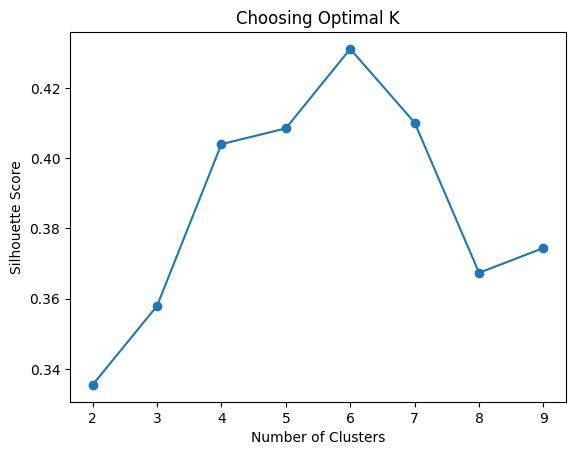

In [22]:
plt.plot(range(2, 10), scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Choosing Optimal K')
plt.show()

In [23]:
optimal_k = scores.index(max(scores)) + 2  # +2 because range starts from 2
print("Best K:", optimal_k)

Best K: 6


In [24]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [26]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.333333           54.266667               49.066667
1        32.692308           86.538462               82.128205
2        25.560000           26.480000               76.240000
3        26.125000           59.425000               44.450000
4        44.000000           90.133333               17.933333
5        45.523810           26.285714               19.380952


In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

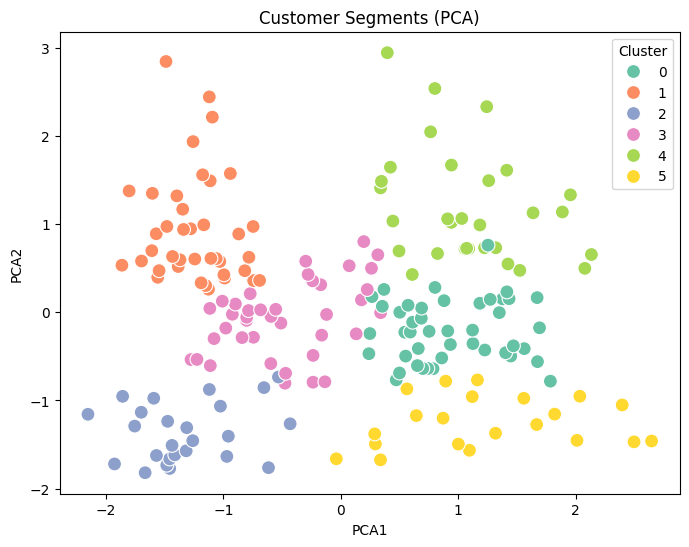

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (PCA)')
plt.show()

In [31]:
for cluster_id, data in df.groupby('Cluster'):
    print(f"\nCluster {cluster_id}:")
    print(f"Count: {len(data)}")
    print(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())


Cluster 0:
Count: 45
Age                       56.333333
Annual Income (k$)        54.266667
Spending Score (1-100)    49.066667
dtype: float64

Cluster 1:
Count: 39
Age                       32.692308
Annual Income (k$)        86.538462
Spending Score (1-100)    82.128205
dtype: float64

Cluster 2:
Count: 25
Age                       25.56
Annual Income (k$)        26.48
Spending Score (1-100)    76.24
dtype: float64

Cluster 3:
Count: 40
Age                       26.125
Annual Income (k$)        59.425
Spending Score (1-100)    44.450
dtype: float64

Cluster 4:
Count: 30
Age                       44.000000
Annual Income (k$)        90.133333
Spending Score (1-100)    17.933333
dtype: float64

Cluster 5:
Count: 21
Age                       45.523810
Annual Income (k$)        26.285714
Spending Score (1-100)    19.380952
dtype: float64
